### Solution By: Suraj K. Ekka
Last updated Oct 09, 2020
___
### Project - Term Deposit Sale

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

### Datasets Information:

1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign

#### Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)
___

#### Domain 
`Banking`


#### GitHub Link 
`Link`

In [1]:
#Packages for data processing
import pandas as pd
import numpy as np

#Packages for Ploting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

#To warnings turn off
import warnings
warnings.filterwarnings('ignore')

#modeling package
from sklearn.model_selection import train_test_split
from scipy import stats
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, classification_report


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import os

In [2]:
df = pd.read_csv('bank_full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape

(45211, 17)

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [6]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

###### Need to change data types to categorical for model input

In [7]:
for feature in df.columns:
    if df[feature].dtypes == 'object':
        df[feature] = pd.Categorical(df[feature])
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


###### Verify changes made

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


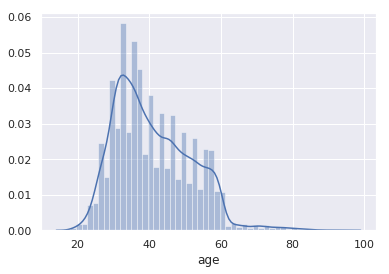

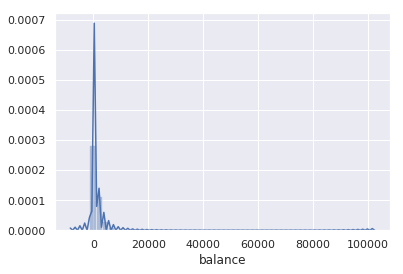

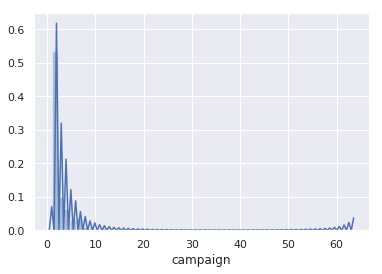

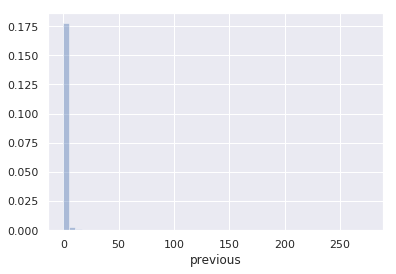

In [10]:
age = df['age']
balance = df['balance']
campaign = df['campaign']
previous = df['previous']

sns.distplot(age)
# sns.boxplot(x=df['age'])
plt.show()
sns.distplot(balance)
plt.show()
sns.distplot(campaign)
plt.show()
sns.distplot(previous)
plt.show()

#### Observation:
Fields Balance, Campaign, previous & Age has outliers

In [11]:
# Identifying Outliers with Interquartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [12]:
# Checking different percentiles for field Balance
df['balance'].describe(percentiles=[0.0005,0.005,0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.99])

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
0.05%     -1832.220000
0.5%       -867.950000
1%         -627.000000
10%           0.000000
20%          22.000000
30%         131.000000
50%         448.000000
80%        1859.000000
90%        3574.000000
99%       13164.900000
max      102127.000000
Name: balance, dtype: float64

In [13]:
# Checking different percentiles for field campaign
df['campaign'].describe(percentiles=[0.0005,0.005,0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.99])

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
0.05%        1.000000
0.5%         1.000000
1%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
50%          2.000000
80%          4.000000
90%          5.000000
99%         16.000000
max         63.000000
Name: campaign, dtype: float64

In [14]:
# Checking different percentiles for field previous
df['previous'].describe(percentiles=[0.0005,0.005,0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.99])

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
0.05%        0.000000
0.5%         0.000000
1%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
50%          0.000000
80%          0.000000
90%          2.000000
99%          8.900000
max        275.000000
Name: previous, dtype: float64

In [15]:
# Checking different percentiles for field age
df['age'].describe(percentiles=[0.0005,0.005,0.01,0.1, 0.2, 0.3, 0.5,0.8,0.9,0.99])

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
0.05%       19.000000
0.5%        22.000000
1%          23.000000
10%         29.000000
20%         32.000000
30%         34.000000
50%         39.000000
80%         51.000000
90%         56.000000
99%         71.000000
max         95.000000
Name: age, dtype: float64

#### Skewness defination:

- skewness = 0 : normally distributed.
- skewness > 0 : more weight in the left tail of the distribution.
- skewness < 0 : more weight in the right tail of the distribution.

In [16]:
print(df['balance'].skew())
print ("")
print(df['campaign'].skew())
print ('')
print(df['previous'].skew())
print ('')
print(df['age'].skew())
print('')

8.360308326166326

4.898650166179674

41.84645447266292

0.6848179257252598



#### Observation:
Data seems positively skewed

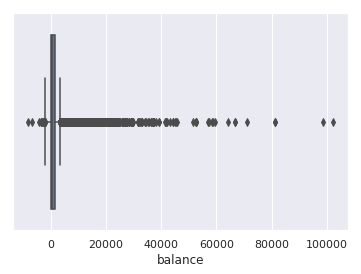

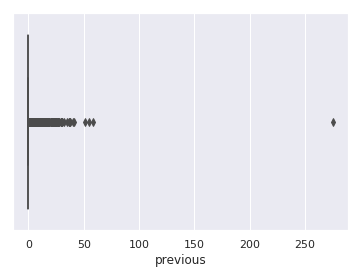

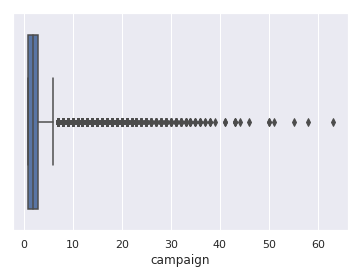

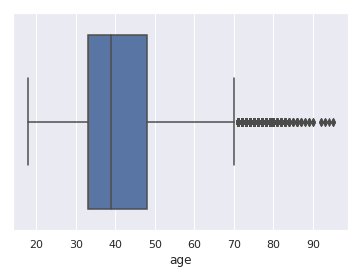

In [17]:
sns.boxplot(df["balance"])
plt.show()
sns.boxplot(df["previous"])
plt.show()
sns.boxplot(df["campaign"])
plt.show()
sns.boxplot(df["age"])
plt.show()

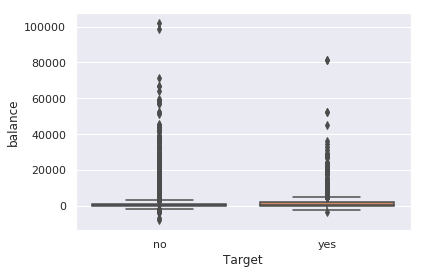

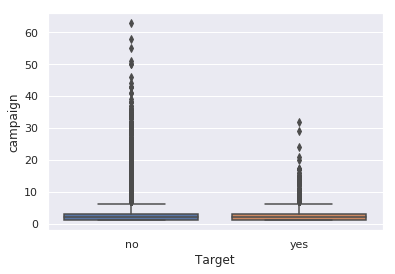

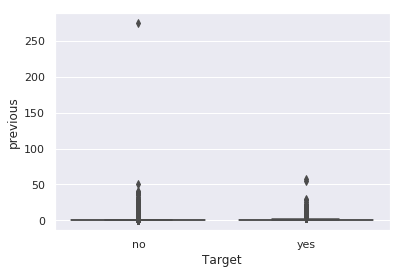

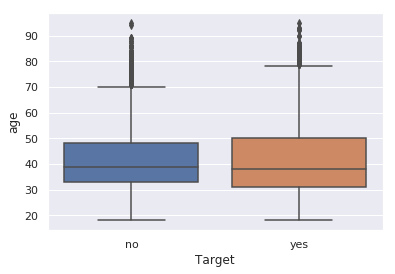

In [18]:
sns.boxplot(x="Target", y="balance", data=df)
plt.show()
sns.boxplot(x="Target", y="campaign", data=df)
plt.show()
sns.boxplot(x="Target", y="previous", data=df)
plt.show()
sns.boxplot(x="Target", y="age", data=df)
plt.show()

In [19]:
print("JOb")
print(df['job'].value_counts(True))

JOb
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64


In [20]:
print("Maritial")
print(df['marital'].value_counts(True))

Maritial
married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64


In [21]:
print("Education")
print(df['education'].value_counts(True))

Education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64


In [22]:
df['default'].value_counts(True)

no     0.981973
yes    0.018027
Name: default, dtype: float64

In [23]:
df['housing'].value_counts(True)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

In [24]:
df['loan'].value_counts(True)

no     0.839774
yes    0.160226
Name: loan, dtype: float64

In [25]:
df['contact'].value_counts(True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [26]:
df['month'].value_counts(True)

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

In [27]:
df['poutcome'].value_counts(True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

In [28]:
df['Target'].value_counts(True)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

###### Observation:
Columns (Job, Education, Contact, poutcome) are having 'unknown' values

##### Univariant/ Bivariant Analysis

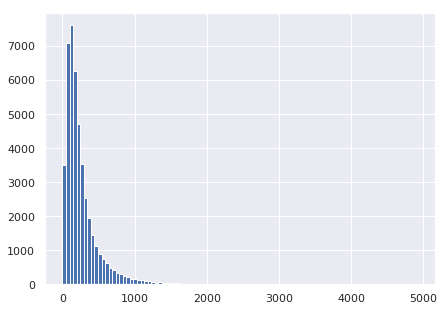

In [29]:
plt.figure(figsize=(7,5))
df.duration.hist(bins=100);
plt.show()

Most of the call duration falls between 0-500 seconds

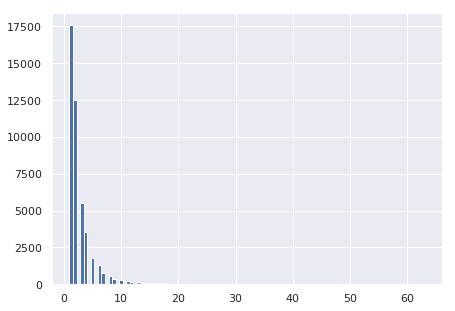

In [30]:
plt.figure(figsize=(7,5))
df.campaign.hist(bins=100);
plt.show()

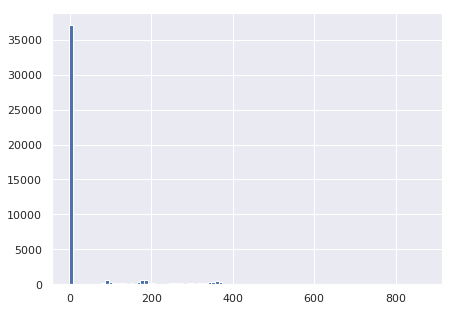

In [31]:
plt.figure(figsize=(7,5))
df.pdays.hist(bins=100);
plt.show()

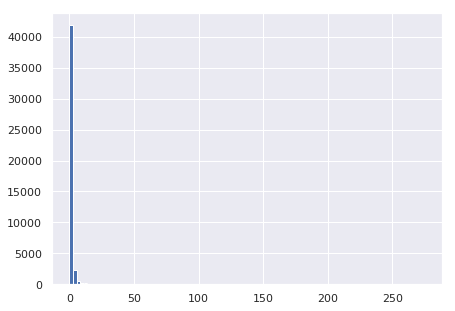

In [32]:
plt.figure(figsize=(7,5))
df.previous.hist(bins=100);
plt.show()

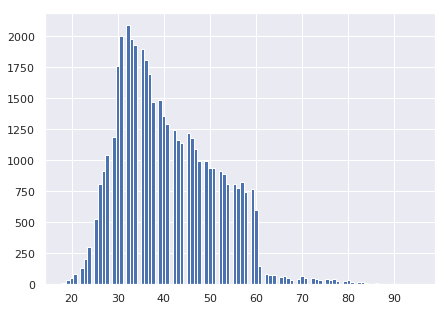

In [33]:
plt.figure(figsize=(7,5))
df.age.hist(bins=100);
plt.show()

Most of the customers falls between 30-60 years of age

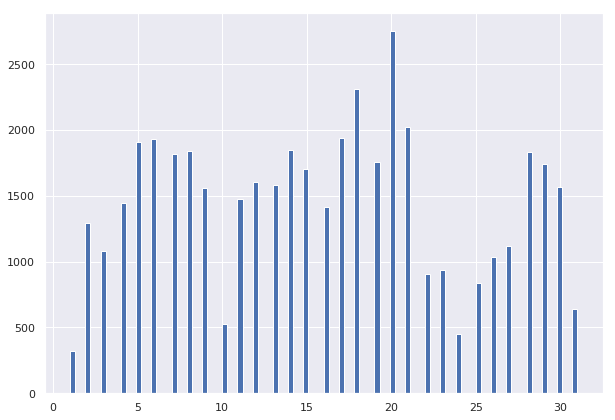

In [34]:
plt.figure(figsize=(10,7))
df.day.hist(bins=100);
plt.show()

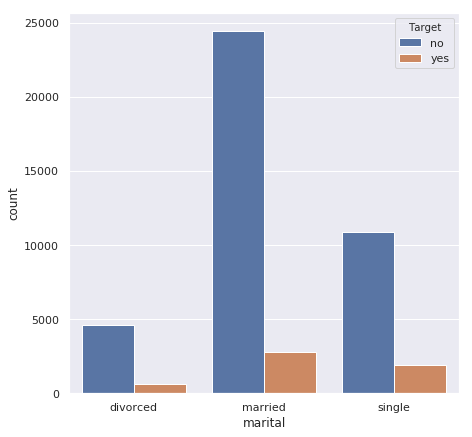

In [35]:
plt.figure(figsize=(7,7))
sns.countplot(x=df['marital'],hue=df['Target'])
plt.show()

In [36]:
replaceStruct = {"Target":     {"no": 0, "yes": 1 } }
df=df.replace(replaceStruct)
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,0


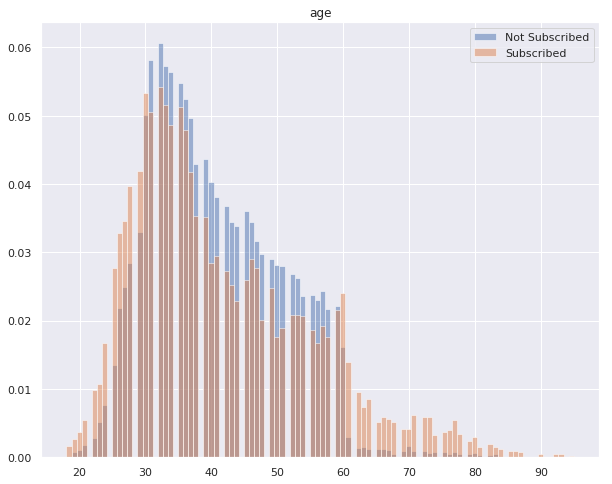

In [37]:
plt.figure(figsize=(10,8))
df['age'][df['Target']==0].hist(bins=100,density=True,alpha=0.5,label='Not Subscribed')
df['age'][df['Target']==1].hist(bins=100,density=True,alpha=0.5,label='Subscribed')
plt.legend()
plt.title('age');

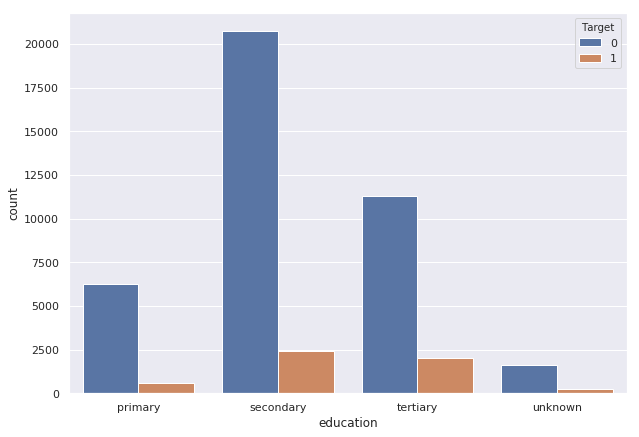

In [38]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['education'],hue=df['Target'])
plt.show()

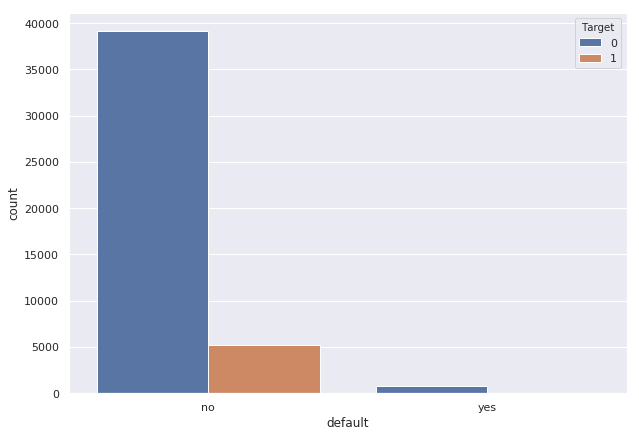

In [39]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['default'],hue=df['Target'])
plt.show()

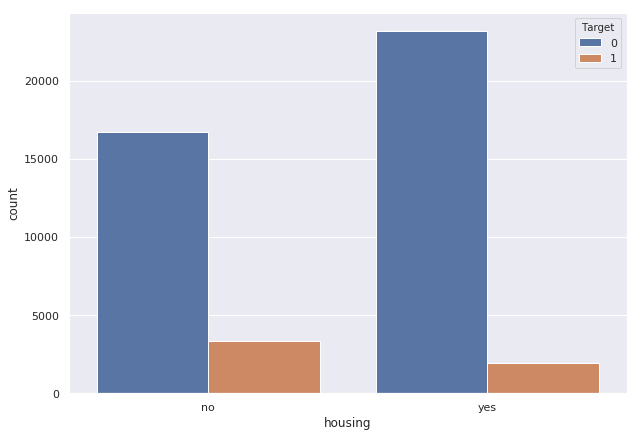

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['housing'],hue=df['Target'])
plt.show()

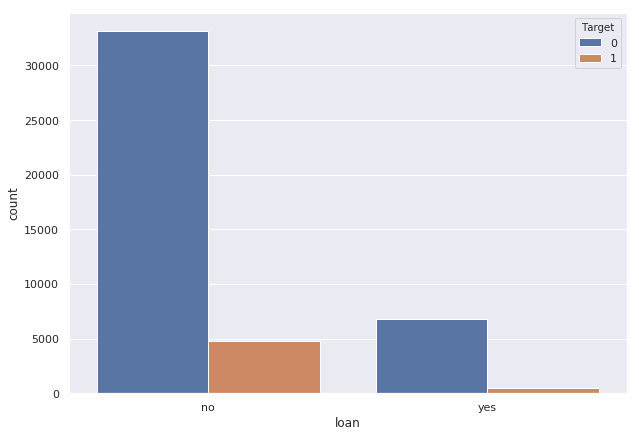

In [41]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['loan'],hue=df['Target'])
plt.show()

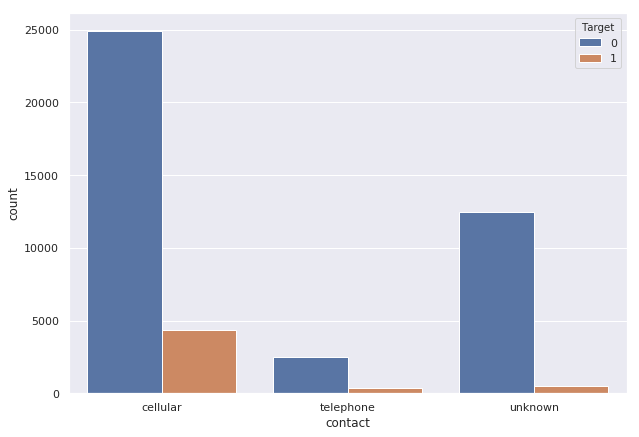

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['contact'],hue=df['Target'])
plt.show()

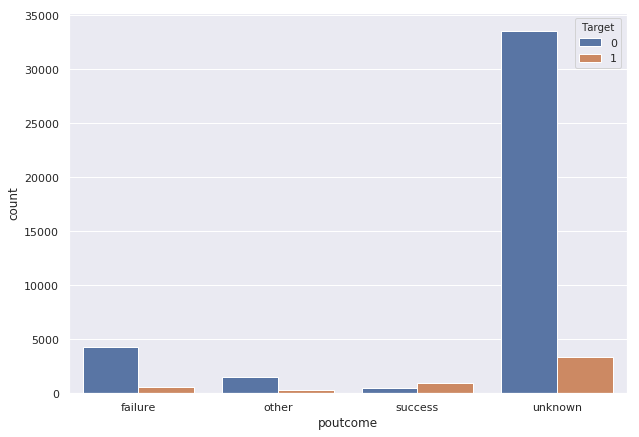

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['poutcome'],hue=df['Target'])
plt.show()

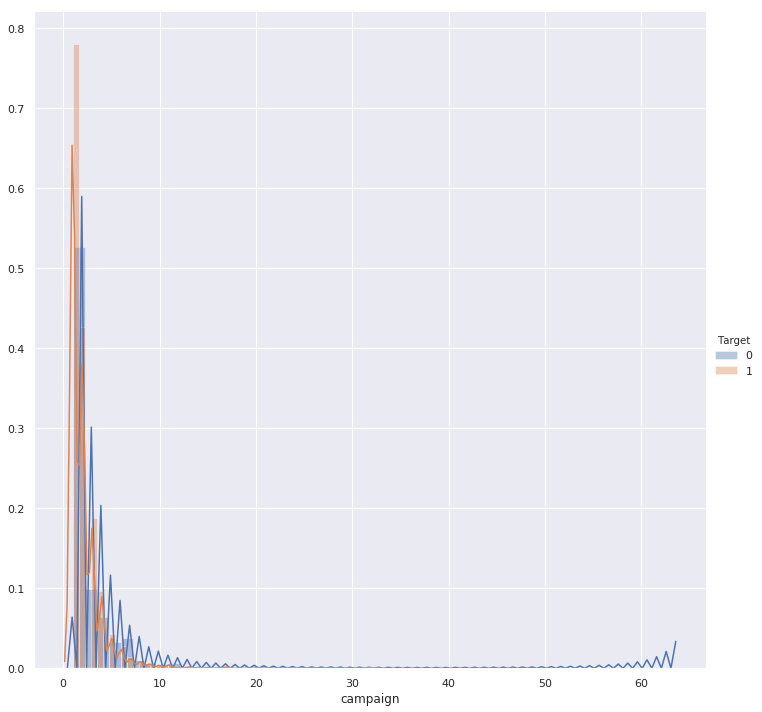

In [44]:
sns.FacetGrid(df,hue="Target",size =10).map(sns.distplot,"campaign").add_legend()
plt.show()

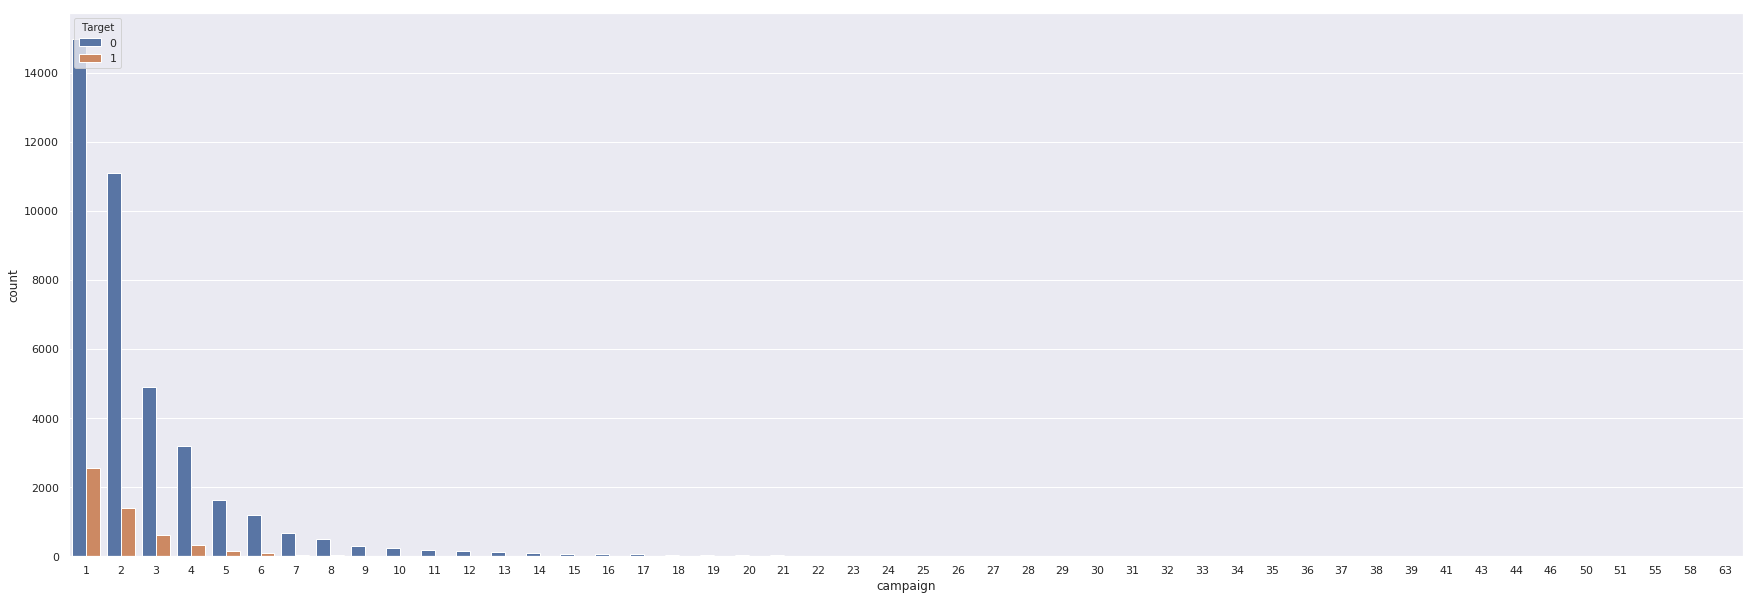

In [45]:
plt.figure(figsize=(30,10))
sns.countplot(x=df['campaign'],hue=df['Target'])
plt.show()

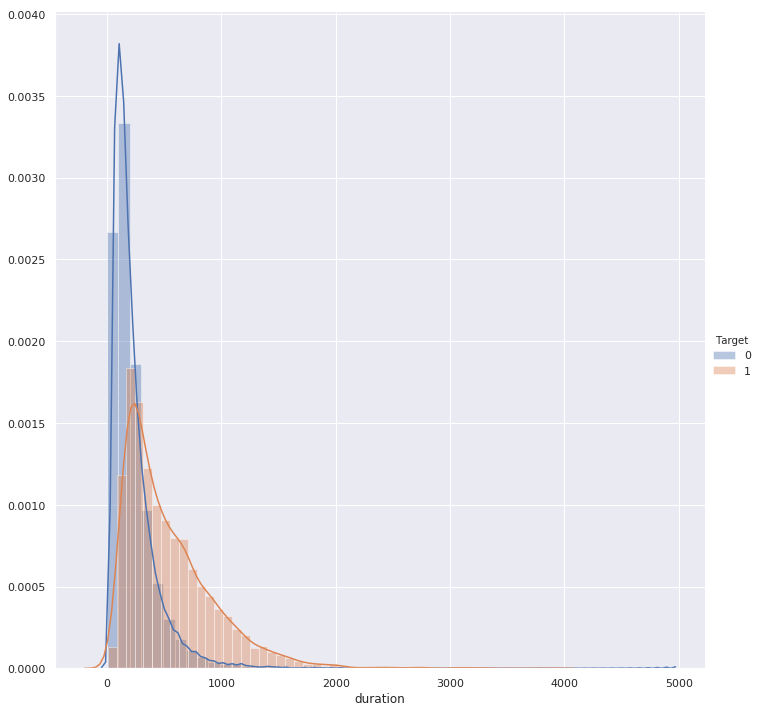

In [46]:
sns.FacetGrid(df,hue="Target",size =10).map(sns.distplot,"duration").add_legend()
plt.show()

Duration gets higher, customers are more likely to subscribe for term loan

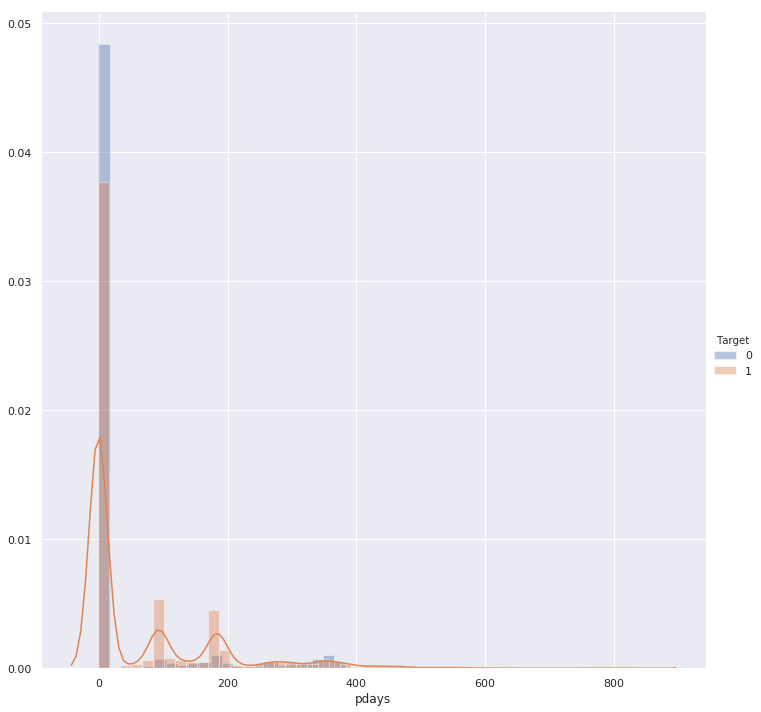

In [47]:
sns.FacetGrid(df,hue="Target",size =10).map(sns.distplot,"pdays").add_legend()
plt.show()

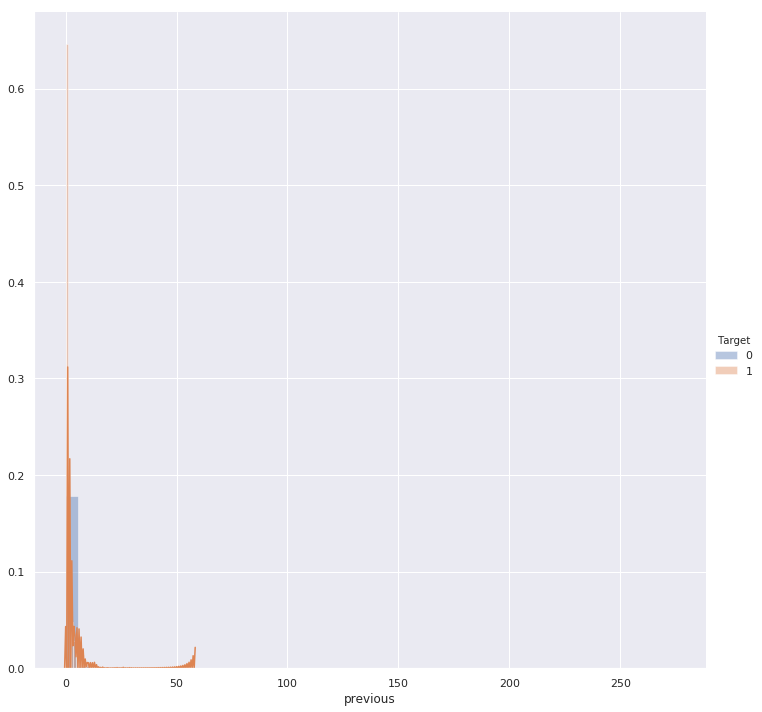

In [48]:
sns.FacetGrid(df,hue="Target",size =10).map(sns.distplot,"previous").add_legend()
plt.show()

In [49]:
# Checking one percentile and 99 percentile range for field Balance
print(df['balance'].quantile(0.01))
print(df['balance'].quantile(0.99))

-627.0
13164.900000000001


In [50]:
# Checking one percentile and 99 percentile range for field campaign
print(df['campaign'].quantile(0.01))
print(df['campaign'].quantile(0.99))

1.0
16.0


In [51]:
# Checking one percentile and 99 percentile range for field previous
print(df['previous'].quantile(0.01))
print(df['previous'].quantile(0.99))

0.0
8.900000000001455


In [52]:
# Checking one percentile and 99 percentile range for field age
print(df['age'].quantile(0.01))
print(df['age'].quantile(0.99))

23.0
71.0


##### Capping & Flooring technique will be used in below to reduce skewness

In [53]:
df["balance"] = np.where(df["balance"] <-627.0, -627.0,df['balance'])
df["balance"] = np.where(df["balance"] >13164.0, 13164.0,df['balance'])
print(df['balance'].skew())

3.0733698632812985


In [54]:
df["campaign"] = np.where(df["campaign"] >16.0, 16.0,df['campaign'])
print(df['campaign'].skew())

2.865333870278598


In [55]:
df["previous"] = np.where(df["previous"] >8.9, 8.9,df['previous'])
print(df['previous'].skew())

3.650506463065352


In [56]:
df["age"] = np.where(df["age"] <23.0, 23.0,df['age'])
df["age"] = np.where(df["age"] >71.0, 71.0,df['age'])

print(df['age'].skew())

0.5526281239582442


#### Contingency Table

In [57]:
def get_contingency_table(df,Target,var):
    ct_res = pd.crosstab(df[var],df[Target],margins=True)
    ct_res["Accepted (%)"]=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns=["All"])

In [58]:
get_contingency_table(df,'Target','poutcome')

Target,0,1,Accepted (%)
poutcome,,,
failure,4283,618,12.61
other,1533,307,16.68
success,533,978,64.73
unknown,33573,3386,9.16
All,39922,5289,11.70


In [59]:
get_contingency_table(df,'Target','previous')

Target,0,1,Accepted (%)
previous,,,
0.0,33570,3384,9.16
1.0,2189,583,21.03
2.0,1650,456,21.65
3.0,848,294,25.74
4.0,543,171,23.95
5.0,338,121,26.36
6.0,194,83,29.96
7.0,151,54,26.34
8.0,90,39,30.23


In [60]:
get_contingency_table(df,'Target','marital')

Target,0,1,Accepted (%)
marital,,,
divorced,4585,622,11.95
married,24459,2755,10.12
single,10878,1912,14.95
All,39922,5289,11.70


In [61]:
get_contingency_table(df,'Target','education')

Target,0,1,Accepted (%)
education,,,
primary,6260,591,8.63
secondary,20752,2450,10.56
tertiary,11305,1996,15.01
unknown,1605,252,13.57
All,39922,5289,11.70


In [62]:
get_contingency_table(df,'Target','housing')

Target,0,1,Accepted (%)
housing,,,
no,16727,3354,16.7
yes,23195,1935,7.7
All,39922,5289,11.7


people who have no housing laon have subscribed more for term deposit

In [63]:
get_contingency_table(df,'Target','education')

Target,0,1,Accepted (%)
education,,,
primary,6260,591,8.63
secondary,20752,2450,10.56
tertiary,11305,1996,15.01
unknown,1605,252,13.57
All,39922,5289,11.70


Who have higher education have subscribed more for term deposit

In [64]:
def get_stratified_ct(df,stra_var,var,target):
    ct_res = pd.crosstab(index=[df[stra_var],df[var]],columns= df[target],margins=True)
    ct_res['Accepted  (%)']=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns='All')

In [65]:
get_stratified_ct(df,'job','marital','Target')

Target                      0     1  Accepted  (%)
job           marital                             
admin.        divorced    660    90          12.00
              married    2387   306          11.36
              single     1493   235          13.60
blue-collar   divorced    692    58           7.73
              married    6531   437           6.27
              single     1801   213          10.58
entrepreneur  divorced    164    15           8.38
              married     989    81           7.57
              single      211    27          11.34
housemaid     divorced    166    18           9.78
              married     845    67           7.35
              single      120    24          16.67
management    divorced    969   142          12.78
              married    4719   681          12.61
              single     2469   478          16.22
retired       divorced    304   121          28.47
              married    1349   382          22.07
              single       95    13          12.04
self-employed divorced    118    22          15.71
              married     914    79           7.96
              single      360    86          19.28
services      divorced    499    50           9.11
              married    2229   178           7.40
              single     1057   141          11.77
student       divorced      5     1          16.67
              married      44    10          18.52
              single      620   258          29.38
technician    divorced    848    77           8.32
              married    3636   416          10.27
              single     2273   347          13.24
unemployed    divorced    144    27          15.79
              married     634    97          13.27
              single      323    78          19.45
unknown       divorced     16     1           5.88
              married     182    21          10.34
              single       56    12          17.65
All                     39922  5289          11.70

In [66]:
get_stratified_ct(df,'default','education','Target')

Target                 0     1  Accepted  (%)
default education                            
no      primary     6139   585           8.70
        secondary  20322  2422          10.65
        tertiary   11121  1982          15.13
        unknown     1577   248          13.59
yes     primary      121     6           4.72
        secondary    430    28           6.11
        tertiary     184    14           7.07
        unknown       28     4          12.50
All                39922  5289          11.70

Who have higher education have defaulted less and subscribed more for term deposit

##### Correlation Check

In [67]:
def plot_corr(df, size=20):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

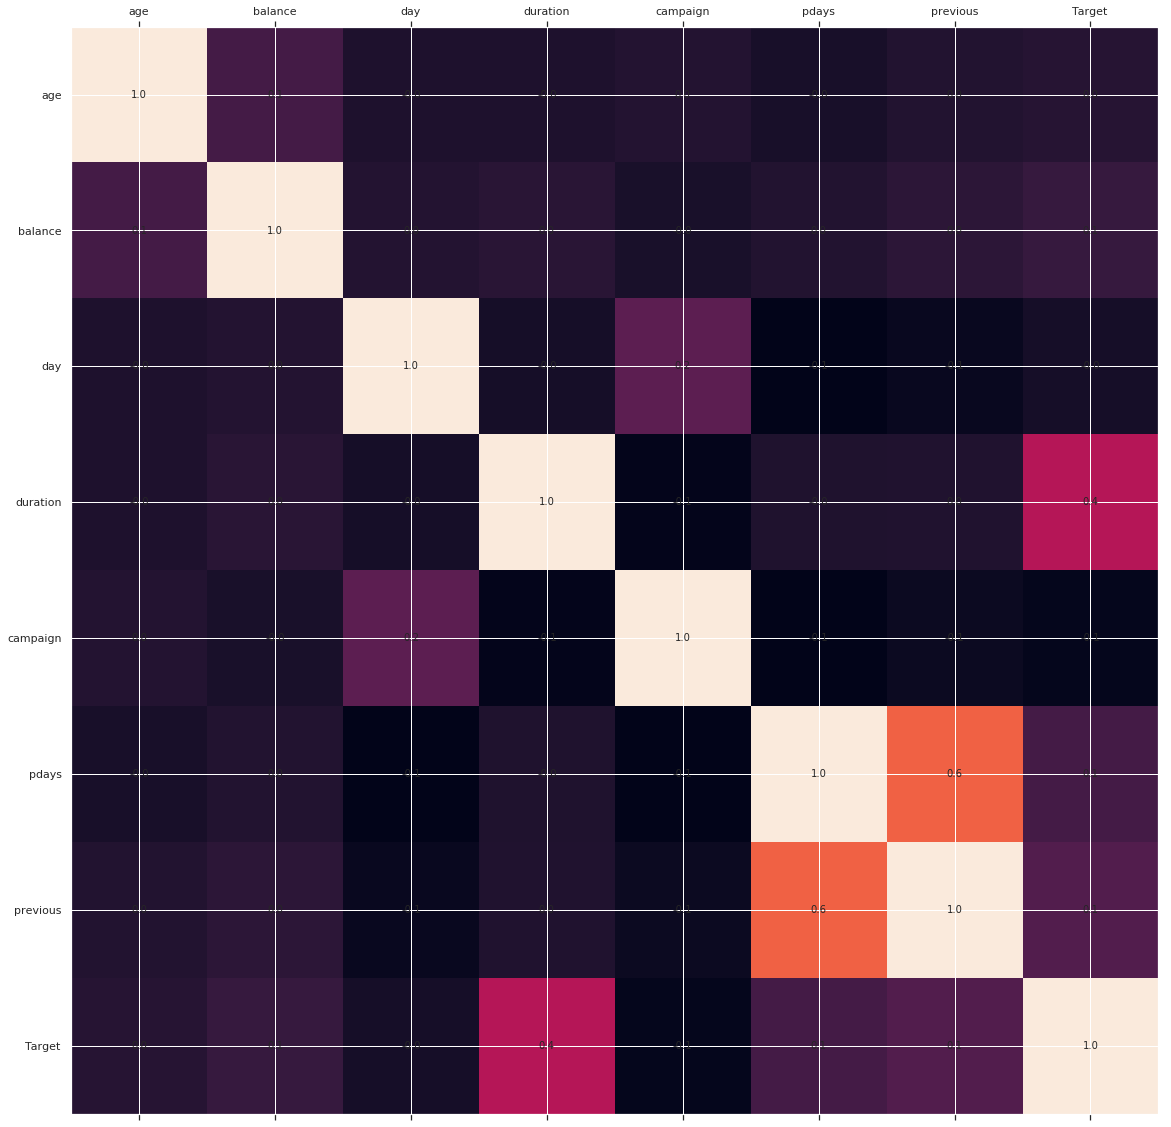

In [68]:
plot_corr(df)

#### Observation:
- There is a high coorelation between Target variable and Duration of the call.
- Observed high corelation between independent variables 'Pdays' and 'Previous'. We can consider any one variable as input

In [69]:
df.drop(['pdays'],axis=1,inplace=True)
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Target
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3.0,0.0,unknown,1
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2.0,0.0,unknown,1
45208,71.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5.0,3.0,success,1
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4.0,0.0,unknown,0
45210,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361,2.0,8.9,other,0


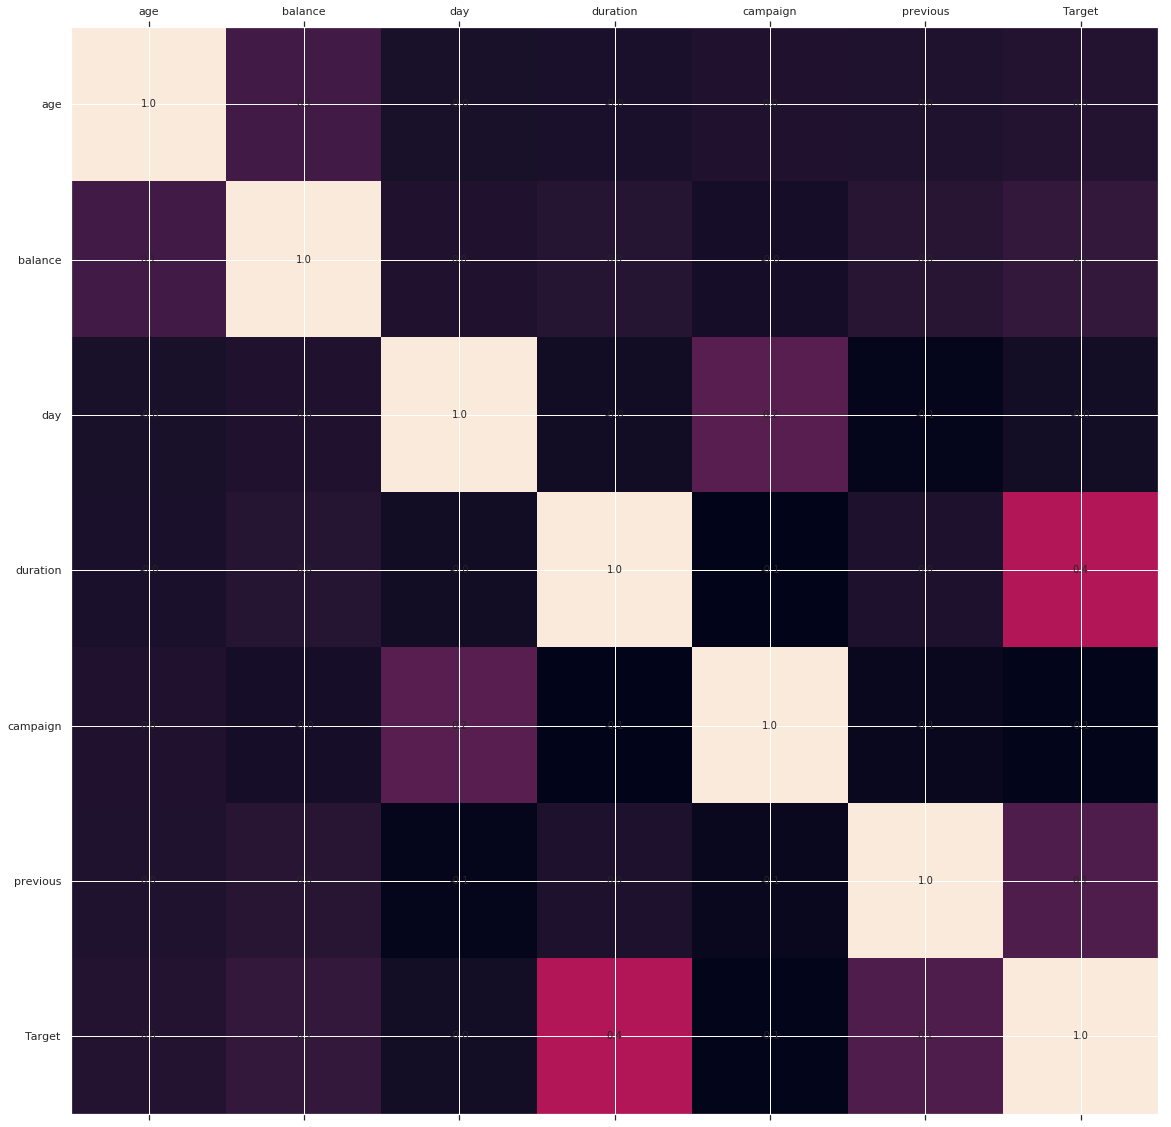

In [70]:
plot_corr(df)

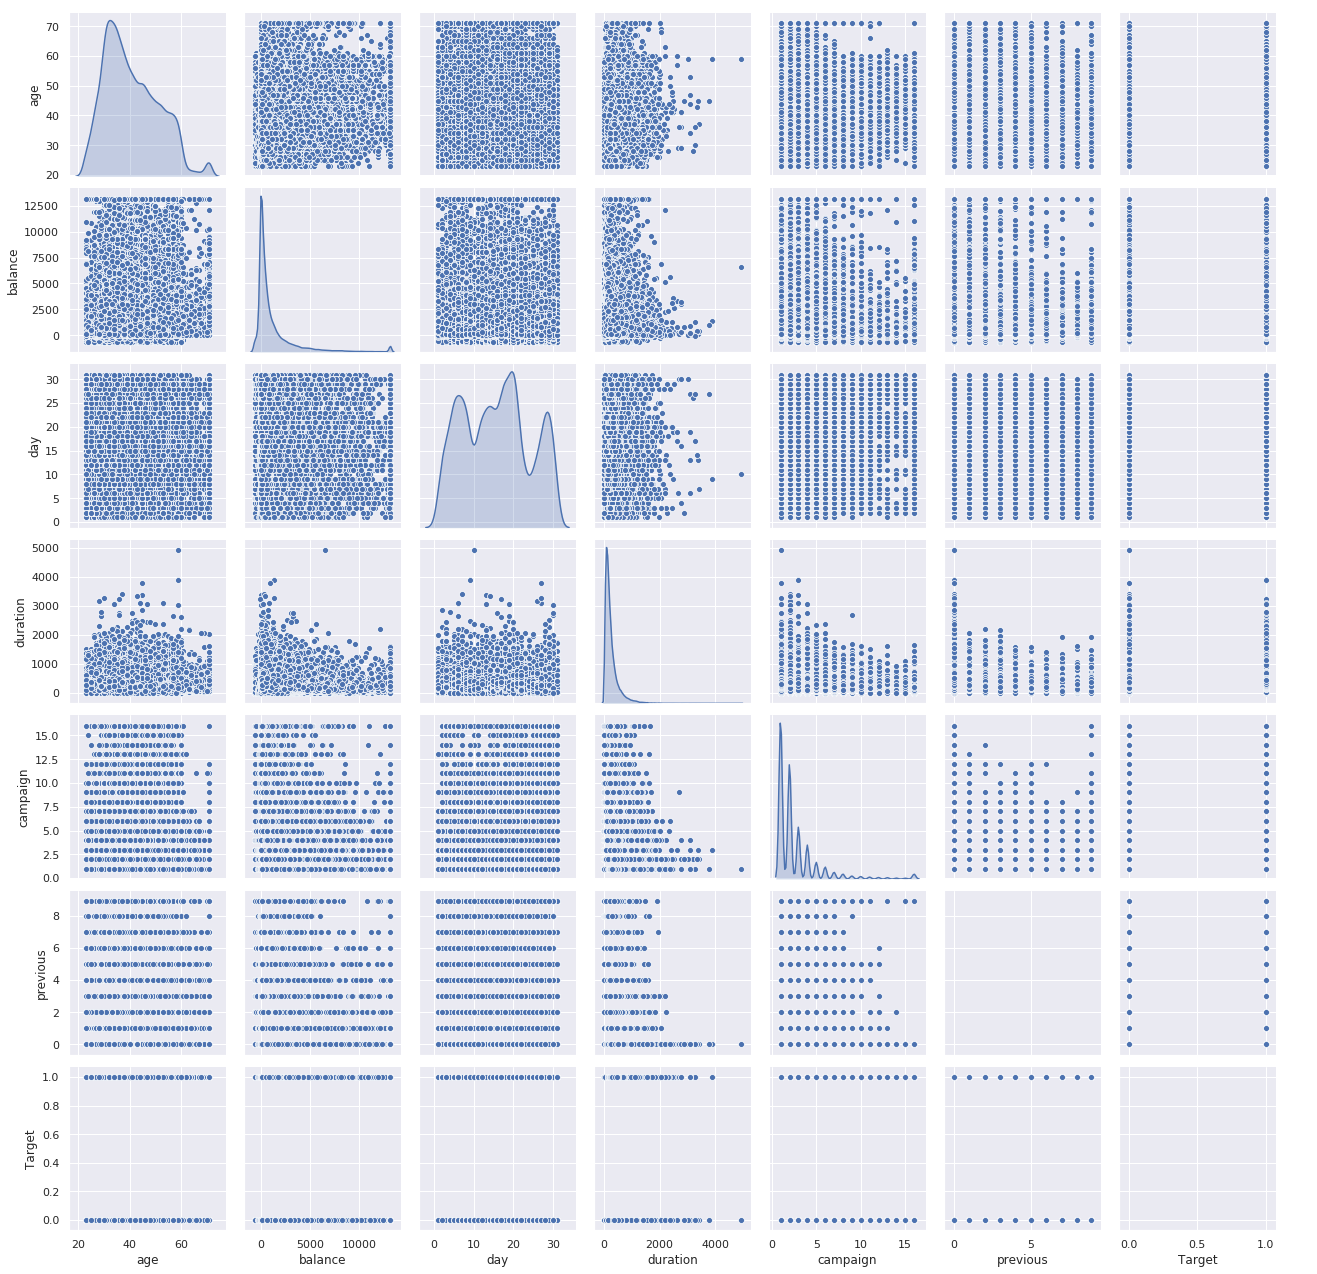

In [71]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [72]:
print("Marital")
print(df.marital.value_counts())
print("")
print("Education")
print(df.education.value_counts())
print("")
print("Default")
print(df.default.value_counts())
print("")
print("Housing")
print(df.housing.value_counts())
print("")
print("Loan")
print(df.loan.value_counts())
print("")
print("Contact")
print(df.contact.value_counts())
print("")
print("Month")
print(df.month.value_counts())
print("")
print("poutcome")
print(df.poutcome.value_counts())
print("")
print("Target")
print(df.Target.value_counts())
print("")
print("Job")
print(df.job.value_counts())

Marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Default
no     44396
yes      815
Name: default, dtype: int64

Housing
yes    25130
no     20081
Name: housing, dtype: int64

Loan
no     37967
yes     7244
Name: loan, dtype: int64

Contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Target
0    39922
1     5289
Name: Target, dtype: int64

Job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entr

In [73]:
# oneHotCols=["job","marital","education","default","housing","loan","contact","month","poutcome"]
oneHotCols=["job","marital","education","default","housing","loan","contact","month","poutcome"]

In [74]:
df['job'] = df['job'].replace(['unemployed'], -1)
df['job'] = df['job'].replace(['unknown'], 1)
df['job'] = df['job'].replace(['student','housemaid','retired'], 2)
df['job'] = df['job'].replace(['admin.','self-employed','technician','services','blue-collar'], 3)
df['job'] = df['job'].replace(['management','entrepreneur'], 4)
print(df.job.value_counts())

df['marital'] = df['marital'].replace(['single'], 1)
df['marital'] = df['marital'].replace(['divorced'], 2)
df['marital'] = df['marital'].replace(['married'], 3)
print(df.marital.value_counts())

df['education'] = df['education'].replace(['unknown'], 1)
df['education'] = df['education'].replace(['primary'], 2)
df['education'] = df['education'].replace(['secondary'], 3)
df['education'] = df['education'].replace(['tertiary'], 4)
print(df.education.value_counts())

df['housing'] = df['housing'].replace(['no'], 0)
df['housing'] = df['housing'].replace(['yes'], 1)
print(df.housing.value_counts())

df['default'] = df['default'].replace(['no'], 0)
df['default'] = df['default'].replace(['yes'], 1)
print(df.default.value_counts())

df['loan'] = df['loan'].replace(['no'], 0)
df['loan'] = df['loan'].replace(['yes'], 1)
print(df.loan.value_counts())

df['poutcome'] = df['poutcome'].replace(['unknown'], 1)
df['poutcome'] = df['poutcome'].replace(['failure'], 2)
df['poutcome'] = df['poutcome'].replace(['other'], 3)
df['poutcome'] = df['poutcome'].replace(['success'], 4)
print(df.poutcome.value_counts())

df['contact'] = df['contact'].replace(['unknown'], 1)
df['contact'] = df['contact'].replace(['telephone'], 2)
df['contact'] = df['contact'].replace(['cellular'], 3)
print(df.contact.value_counts())

df['month'] = df['month'].replace(["jan","feb","mar"], 1)
df['month'] = df['month'].replace(["apr","may","jun"], 2)
df['month'] = df['month'].replace(["jul","aug","sep"], 3)
df['month'] = df['month'].replace(["oct","nov","dec"], 4)

print(df.month.value_counts())

 3    28233
 4    10945
 2     4442
-1     1303
 1      288
Name: job, dtype: int64
3    27214
1    12790
2     5207
Name: marital, dtype: int64
3    23202
4    13301
2     6851
1     1857
Name: education, dtype: int64
1    25130
0    20081
Name: housing, dtype: int64
0    44396
1      815
Name: default, dtype: int64
0    37967
1     7244
Name: loan, dtype: int64
1    36959
2     4901
3     1840
4     1511
Name: poutcome, dtype: int64
3    29285
1    13020
2     2906
Name: contact, dtype: int64
2    22039
3    13721
4     4922
1     4529
Name: month, dtype: int64


### Logistic Model

In [75]:
# independant variables
x = df.drop(["Target"], axis=1)
# the dependent variable
y = df[["Target"]]
df.shape

(45211, 16)

Dummy Variable creation

In [76]:
# Creating Dummy Variables
x=pd.get_dummies(x, columns=oneHotCols,drop_first = True)

In [77]:
x.tail()

,age,balance,day,duration,campaign,previous,job_1,job_2,job_3,job_4,...,housing_1,loan_1,contact_2,contact_3,month_2,month_3,month_4,poutcome_2,poutcome_3,poutcome_4
45206,51.0,825.0,17,977,3.0,0.0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
45207,71.0,1729.0,17,456,2.0,0.0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
45208,71.0,5715.0,17,1127,5.0,3.0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
45209,57.0,668.0,17,508,4.0,0.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
45210,37.0,2971.0,17,361,2.0,8.9,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


##### Splitting Data into 70:30

In [78]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [79]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


#### Check Term deposit acceptance ratio in split data

In [80]:
print("Original Term Deposit True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Target'] == 1]), (len(df.loc[df['Target'] == 1])/len(df.index)) * 100))
print("Original Term Deposit False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Target'] == 0]), (len(df.loc[df['Target'] == 0])/len(df.index)) * 100))
print("")
print("Training Term Deposit True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train['Target'] == 1]), (len(y_train[y_train['Target'] == 1])/len(y_train)) * 100))
print("Training Term Deposit False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train['Target'] == 0]), (len(y_train[y_train['Target'] == 0])/len(y_train)) * 100))
print("")
print("Test Term Deposit True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test['Target'] == 1]), (len(y_test[y_test['Target'] == 1])/len(y_test)) * 100))
print("Test Term Deposit False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test['Target'] == 0]), (len(y_test[y_test['Target'] == 0])/len(y_test)) * 100))
print("")

Original Term Deposit True Values    : 5289 (11.70%)
Original Term Deposit False Values   : 39922 (88.30%)

Training Term Deposit True Values    : 3755 (11.87%)
Training Term Deposit False Values   : 27892 (88.13%)

Test Term Deposit True Values        : 1534 (11.31%)
Test Term Deposit False Values       : 12030 (88.69%)



In [81]:
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.251807
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31620
Method:                           MLE   Df Model:                           26
Date:                Fri, 09 Oct 2020   Pseudo R-squ.:                  0.3087
Time:                        18:54:25   Log-Likelihood:                -7968.9
converged:                       True   LL-Null:                       -11527.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.8543      0.200    -19.254      0.000      -4.247      -3.462
age             0.0027    

In [82]:
#Calculate the odds ratio
lgcoef = pd.DataFrame(lg.params,columns = ['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability']=lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [83]:
# Filter by significant P- Value (pval <0.1) and sort descending by odds ratio
lgcoef = lgcoef.sort_values(by = "Odds_ratio",ascending = False)
pval_filter = lgcoef['pval']<=0.5
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
poutcome_4,2.47,11.87,0.92,0.00
contact_3,1.39,4.03,0.80,0.00
contact_2,1.27,3.55,0.78,0.00
job_2,0.54,1.72,0.63,0.00
poutcome_3,0.27,1.30,0.57,0.02
education_4,0.14,1.15,0.53,0.20
month_2,0.09,1.09,0.52,0.20
previous,0.06,1.06,0.51,0.00
duration,0.00,1.00,0.50,0.00
age,0.00,1.00,0.50,0.25


In [84]:
features = x.iloc[:,0:19].values
target = y.values


X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=7)

logreg = LogisticRegression(random_state=7,penalty='l2', solver='newton-cg')  #assigning a variable for the algorithm

logreg.fit(X_train, y_train) #training of model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
# y_predict = logreg.predict(X_test)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",logreg.score(X_train,y_train))  # this will give training accuracy as training data has been used
print()
print("Testing accuracy",logreg.score(X_test, y_test))   # this will give testing accuracy as testing data has been used

Trainig accuracy 0.8884254431699687

Testing accuracy 0.8956797404895311


In [86]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 7,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

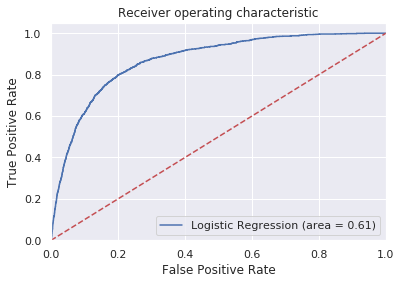

In [87]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [88]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [89]:
preds = logreg.predict(X_test)

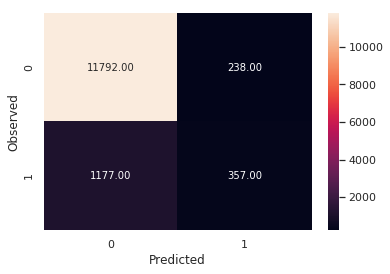

None

Recall: 0.23272490221642764

Precision: 0.6

F1 Score: 0.33536871770784404

Roc Auc Score: 0.6064705142836088


In [90]:
print(draw_cm(y_test,preds))
print()
print("Recall:",recall_score(y_test,preds))
print()
print("Precision:",precision_score(y_test,preds))
print()
print("F1 Score:",f1_score(y_test,preds))
print()
print("Roc Auc Score:",roc_auc_score(y_test,preds))

In [91]:
def get_roc_cure(model,title):
    logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label= title + '(area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
#     plt.savefig('Log_ROC')
    plt.show()

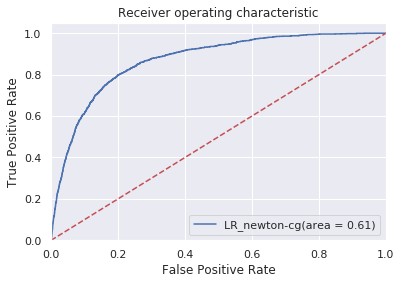

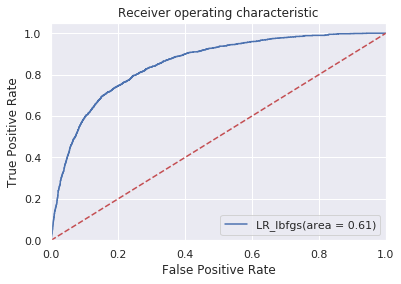

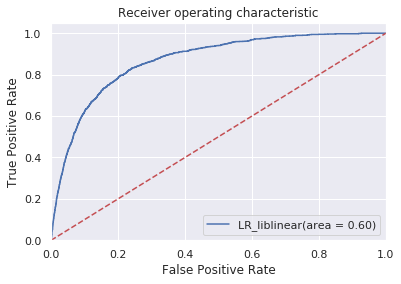

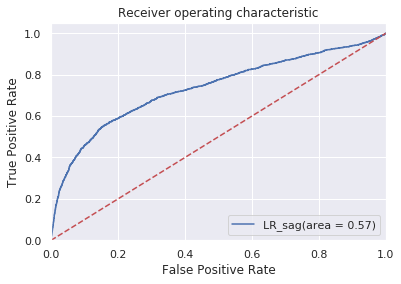

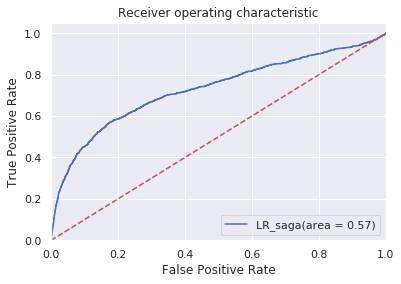

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.888, 0.887, 0.887, 0.885, 0.885]

[0.896, 0.895, 0.895, 0.893, 0.893]


In [92]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=7,penalty='l2', solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test) 
    get_roc_cure(model,'LR_'+i)
    train_score.append(round(model.score(X_train,y_train),3))
    test_score.append(round(model.score(X_test,y_test),3))
    
    
print(solver)
print()
print(train_score)
print()
print(test_score)

In [93]:
acc_LR = accuracy_score(y_test, preds)
F1_LR = f1_score(y_test, preds)
precision_LR = precision_score(y_test, preds)
recall_LR = recall_score(y_test, preds)
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'Accuracy': acc_LR,'F1_Score': F1_LR,'Precision':precision_LR,'Recall':recall_LR})
resultsDf = resultsDf[['Method', 'Accuracy','F1_Score','Precision','Recall']]
resultsDf

,Method,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,0.90,0.34,0.60,0.23


#### Decesion Tree

In [94]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Target
45206,51.00,3,3,4,0,825.00,0,0,3,17,4,977,3.00,0.00,1,1
45207,71.00,2,2,2,0,1729.00,0,0,3,17,4,456,2.00,0.00,1,1
45208,71.00,2,3,3,0,5715.00,0,0,3,17,4,1127,5.00,3.00,4,1
45209,57.00,3,3,3,0,668.00,0,0,2,17,4,508,4.00,0.00,1,0
45210,37.00,4,3,3,0,2971.00,0,0,3,17,4,361,2.00,8.90,3,0


#### Split Data 70:30

In [95]:
X_train, X_test, y_train, y_test =train_test_split(df.drop('Target',axis=1), df['Target'], test_size=.30,
                                                   random_state=22)
X_train.shape,X_test.shape

((31647, 15), (13564, 15))

In [96]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [97]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
model_entropy.score(X_train, y_train)  # performance on train data

1.0

In [99]:
model_entropy.score(X_test, y_test)  # performance on test data

0.8690651725154822

#### Pruning the model

In [100]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [101]:
xvar = df.drop('Target', axis=1)
feature_cols = xvar.columns

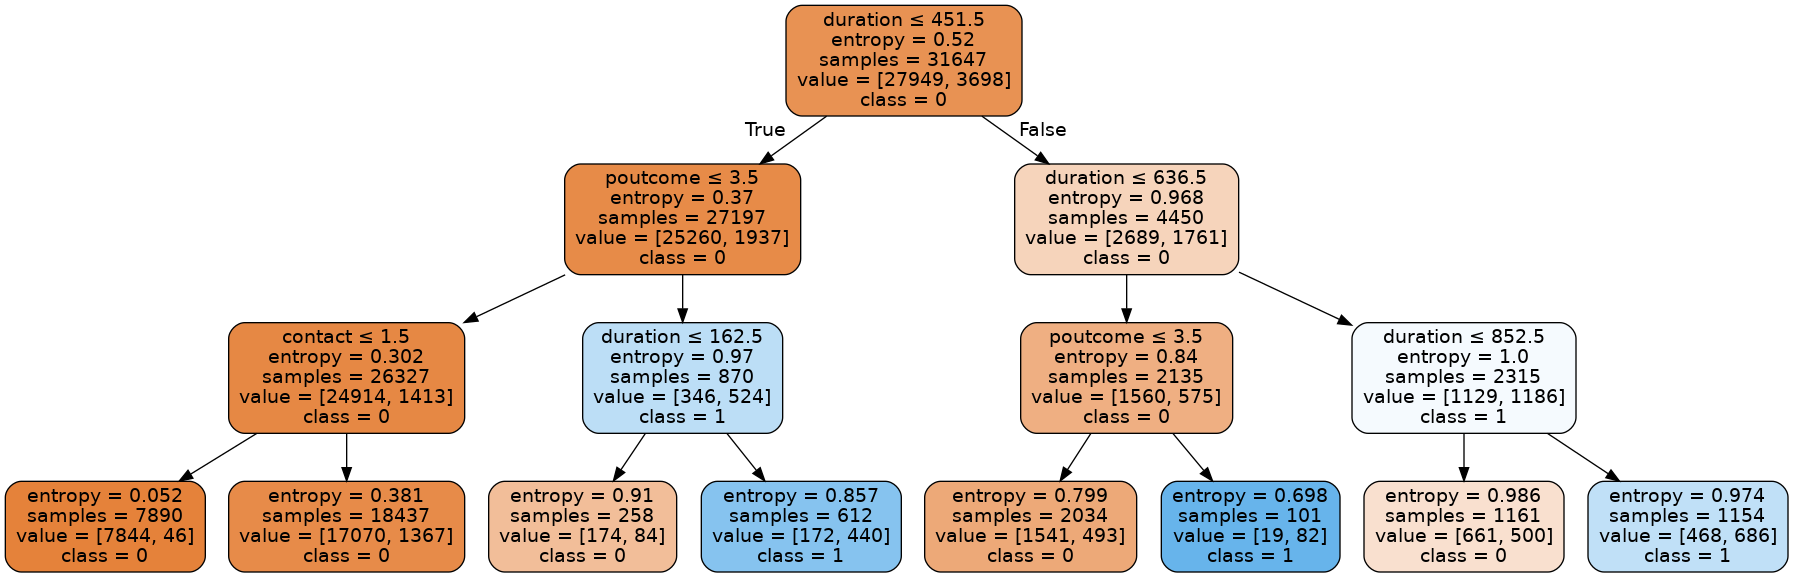

In [102]:
os.environ["PATH"] += os.pathsep + 'C:\\programdata\\Anaconda3\\Library\\bin\\graphviz'
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Target_pruned.png')
Image(graph.create_png())

In [103]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [104]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.8995871424358596
0.9004960975763896


In [105]:
acc_DT = accuracy_score(y_test, preds_pruned)
F1_DT = f1_score(y_test, preds_pruned)
precision_DT = precision_score(y_test, preds_pruned)
recall_DT = recall_score(y_test, preds_pruned)
print(acc_DT)
print(F1_DT)
print(precision_DT)
print(recall_DT)

0.8995871424358596
0.42964824120603023
0.64366373902133
0.322438717787555


In [106]:
preds_pruned_train[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [107]:
preds_pruned[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##### Calculating feature importance

In [108]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.56
poutcome,0.32
contact,0.12
age,0.00
job,0.00
marital,0.00
education,0.00
default,0.00
balance,0.00
housing,0.00


##### Store the accuracy results for each model in a dataframe for final comparison

In [109]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': acc_DT, 'F1_Score': F1_DT, 'Precision': precision_DT, 'Recall': recall_DT })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'F1_Score', 'Precision', 'Recall']]
resultsDf

,Method,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,0.90,0.34,0.60,0.23
0,Decision Tree,0.90,0.43,0.64,0.32


#### Baggong Technique

In [110]:
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [111]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
F1_BG = f1_score(y_test, pred_BG)
precision_BG = precision_score(y_test, pred_BG)
recall_BG = recall_score(y_test, pred_BG)
print(acc_BG)
print(F1_BG)
print(precision_BG)
print(recall_BG)

0.9003981126511353
0.49832900111399925
0.6088929219600726
0.4217473287240729


In [112]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'Accuracy': acc_BG, 'F1_Score': F1_BG, 'Precision': precision_BG, 'Recall': recall_BG })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'F1_Score', 'Precision', 'Recall']]
resultsDf

,Method,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,0.90,0.34,0.60,0.23
0,Decision Tree,0.90,0.43,0.64,0.32
0,Bagging,0.90,0.50,0.61,0.42


#### Adaboost

In [113]:
abcl = AdaBoostClassifier(n_estimators = 10, learning_rate=1.0, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [114]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
F1_AB = f1_score(y_test, pred_AB)
precision_AB = precision_score(y_test, pred_AB)
recall_AB = recall_score(y_test, pred_AB)
print(acc_AB)
print(F1_AB)
print(precision_AB)
print(recall_AB)

0.8951636685343557
0.46940298507462686
0.5775941230486685
0.3953488372093023


In [115]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'Accuracy': acc_AB, 'F1_Score': F1_AB, 'Precision': precision_AB, 'Recall': recall_AB })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'F1_Score', 'Precision', 'Recall']]
resultsDf

,Method,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,0.90,0.34,0.60,0.23
0,Decision Tree,0.90,0.43,0.64,0.32
0,Bagging,0.90,0.50,0.61,0.42
0,Adaboost,0.90,0.47,0.58,0.40


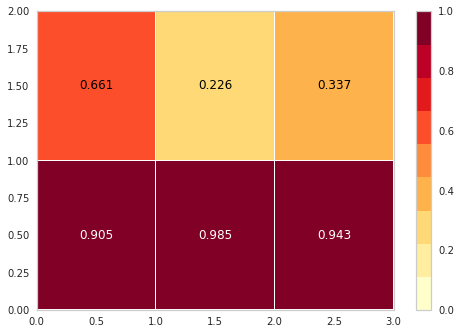

In [116]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
plt.show()

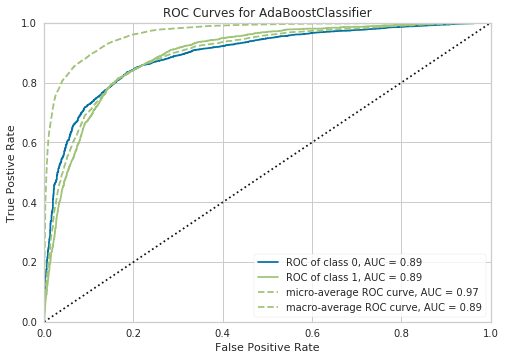

In [117]:
roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()
plt.show()

#### Gradient boosting Technique

In [118]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [119]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [120]:
acc_GB = accuracy_score(y_test, pred_GB)
F1_GB = f1_score(y_test, pred_GB)
precision_GB = precision_score(y_test, pred_GB)
recall_GB = recall_score(y_test, pred_GB)
print(acc_GB)
print(F1_GB)
print(precision_GB)
print(recall_GB)

0.9015039811265113
0.4604200323101777
0.6440677966101694
0.3582652419861722


In [121]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'Accuracy': acc_GB, 'F1_Score': F1_GB, 'Precision': precision_GB, 'Recall': recall_GB })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Accuracy', 'F1_Score', 'Precision', 'Recall']]
resultsDf

,Method,Accuracy,F1_Score,Precision,Recall
0,Logistic Regression,0.90,0.34,0.60,0.23
0,Decision Tree,0.90,0.43,0.64,0.32
0,Bagging,0.90,0.50,0.61,0.42
0,Adaboost,0.90,0.47,0.58,0.40
0,Gradient Boost,0.90,0.46,0.64,0.36


#### Conclusion & Suggestions:
- We are concluding & suggesting that Bagging technique has given best results in the provided 
- Although accuracy is getting approximately same through each meathod, but F1 score, Precision & Recall are highest for Bagging technique